In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv').dropna()
df = pd.DataFrame(data)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


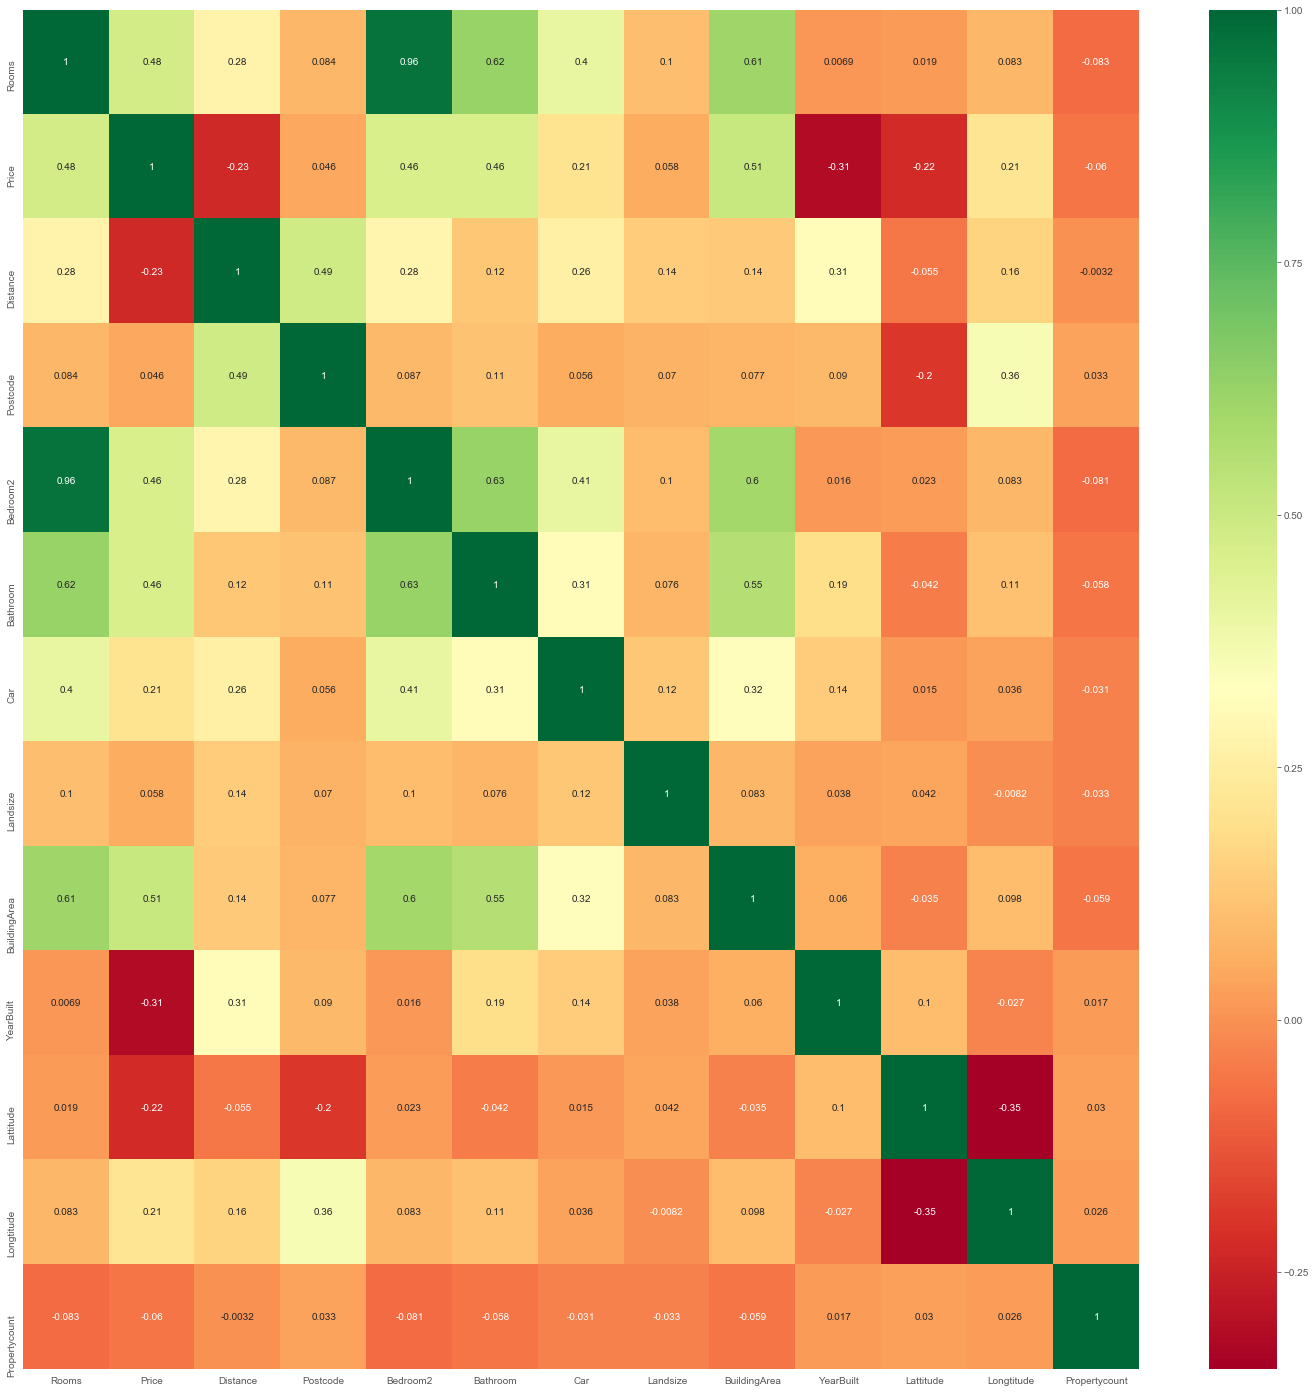

In [3]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [4]:
df.Suburb.nunique()

315

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


### Standardize all the data

Remove Long/Lat 

Remove postcode, regionname, councilarea, address, SellerG, Date

Start with LinearRegression / RandomForest

Add Dummies for 'Suburb', 'Type', 'Method'

In [7]:
#Drop redundant or unecessary columns

dfo = df.drop(['Address','SellerG','Postcode','CouncilArea','Lattitude', 'Longtitude', 'Regionname', 'Date'], axis=1)
dfo = dfo.reset_index(drop=True)
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 13 columns):
Suburb           8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
Distance         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
Propertycount    8887 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 902.7+ KB


In [8]:
#Add Dummies

df1 = pd.get_dummies(dfo, prefix=['Address', 'Type', 'Method'])

In [9]:
from scipy import stats

# find zscores (This is to remove outliers)
z = np.abs(stats.zscore(df1.iloc[:, 0:7])) #Columns 0-7 will have outliers dropped
# get indices of outliers
outliers = list(np.where(z > 3)[0])
# drop them
df2 = df1.drop(outliers)
df2 = df2.reset_index(drop=True) #Reset our index

In [10]:
from sklearn.model_selection import train_test_split

X = df2.drop(['Price'], axis=1) #training features
y = df2.Price #target

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .1)

### Using RandomForestRegressor

In [14]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()
rfr.fit(x_train, y_train)

print('Training accuracy normal RandomForest is: {}'.format(rfr.score(x_train, y_train)))
print('Test accuracy normal RandomForest is: {}'.format(rfr.score(x_test, y_test)))

scores = cross_val_score(rfr, x_train, y_train, cv=5)
print("Cross Val Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal RandomForest is: 0.9564102058812824
Test accuracy normal RandomForest is: 0.7908033637051536
Cross Val Forest Accuracy: 0.75 (+/- 0.02)


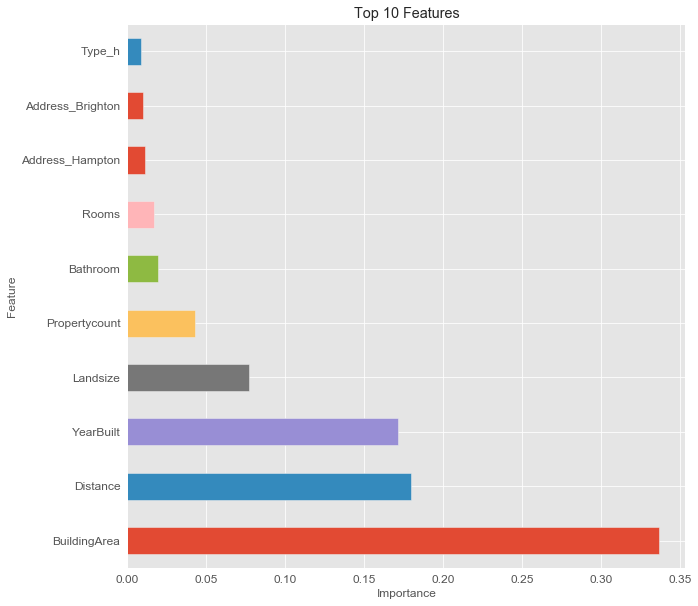

In [15]:
#Find feature imporatance here for reference
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))

feat_importances.nlargest(10).plot(kind='barh')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

In [16]:
df2sort = df2.sort_values('Price') #Sort data based on price for graphing
df2sort = df2sort.reset_index(drop=True)
x_sort2 = df2sort.drop(['Price'], axis=1)

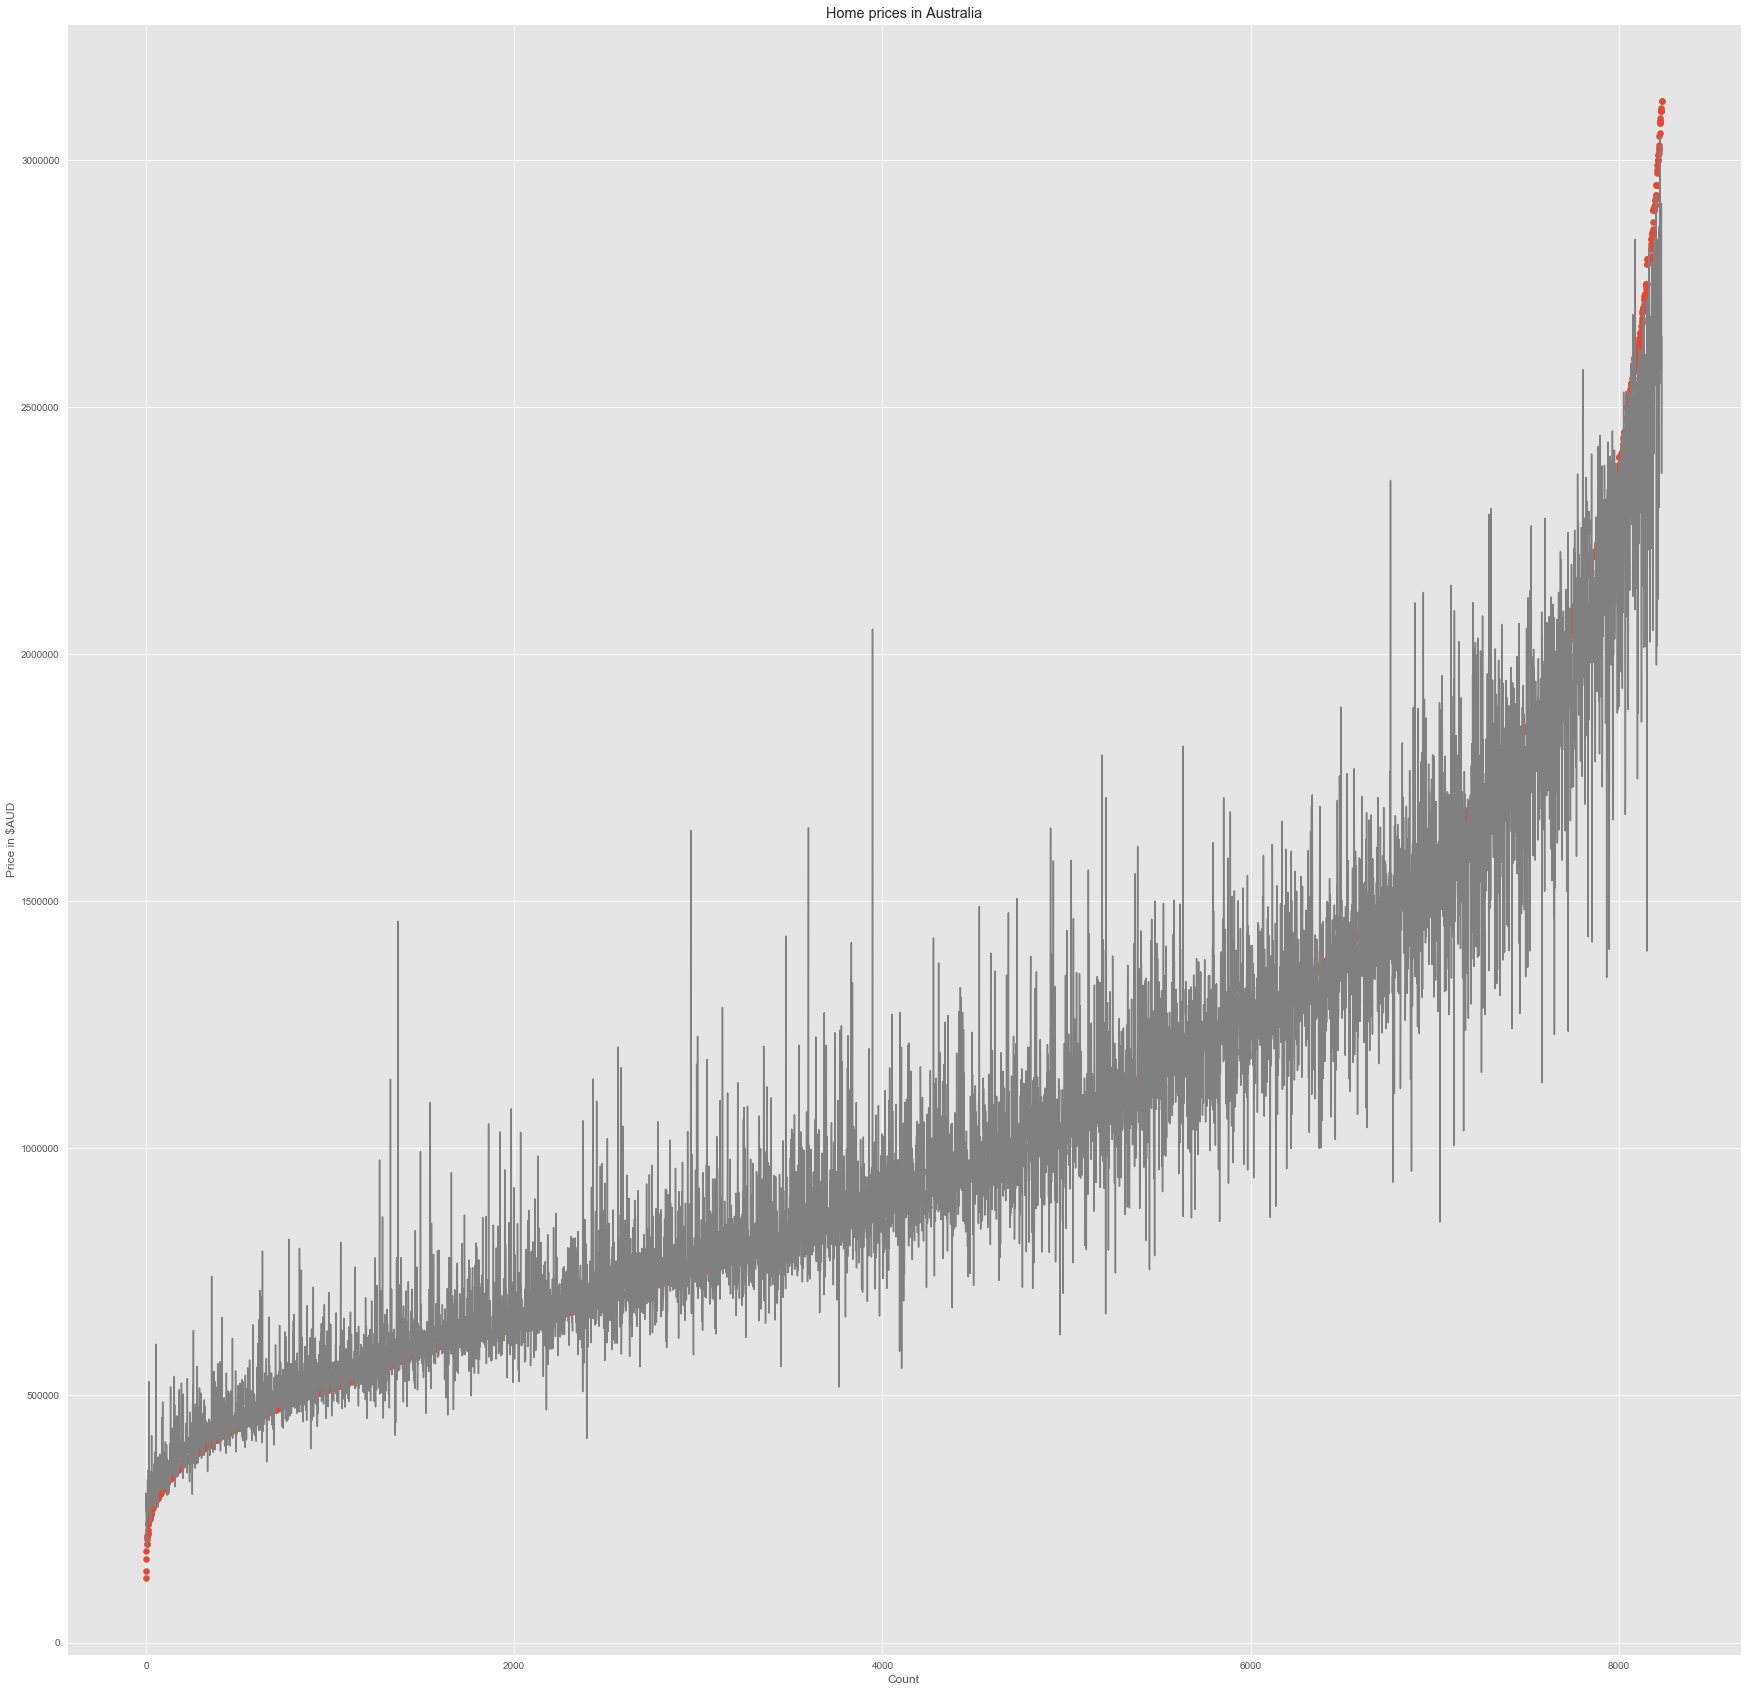

In [17]:
plt.figure(figsize=(30,30))
plt.plot(np.arange(8233), rfr.predict(x_sort2), color='gray')
plt.scatter(np.arange(8233), y.sort_values())
plt.xlabel('Count')
plt.ylabel('Price in $AUD')
plt.title('Home prices in Australia')
plt.show()

### Using Normal Linear Regression

In [18]:
from sklearn import linear_model

regr1 = linear_model.LinearRegression()
regr1.fit(x_train, y_train)

print('Training accuracy normal LinearRegression is: {}'.format(regr1.score(x_train, y_train)))
print('Test accuracy normal LinearRegression is: {}'.format(regr1.score(x_test, y_test)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr1, x_train, y_train, cv=15)
print("Cross Val Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal LinearRegression is: 0.783619437828084
Test accuracy normal LinearRegression is: 0.771935509254483
Cross Val Accuracy: 0.76 (+/- 0.04)


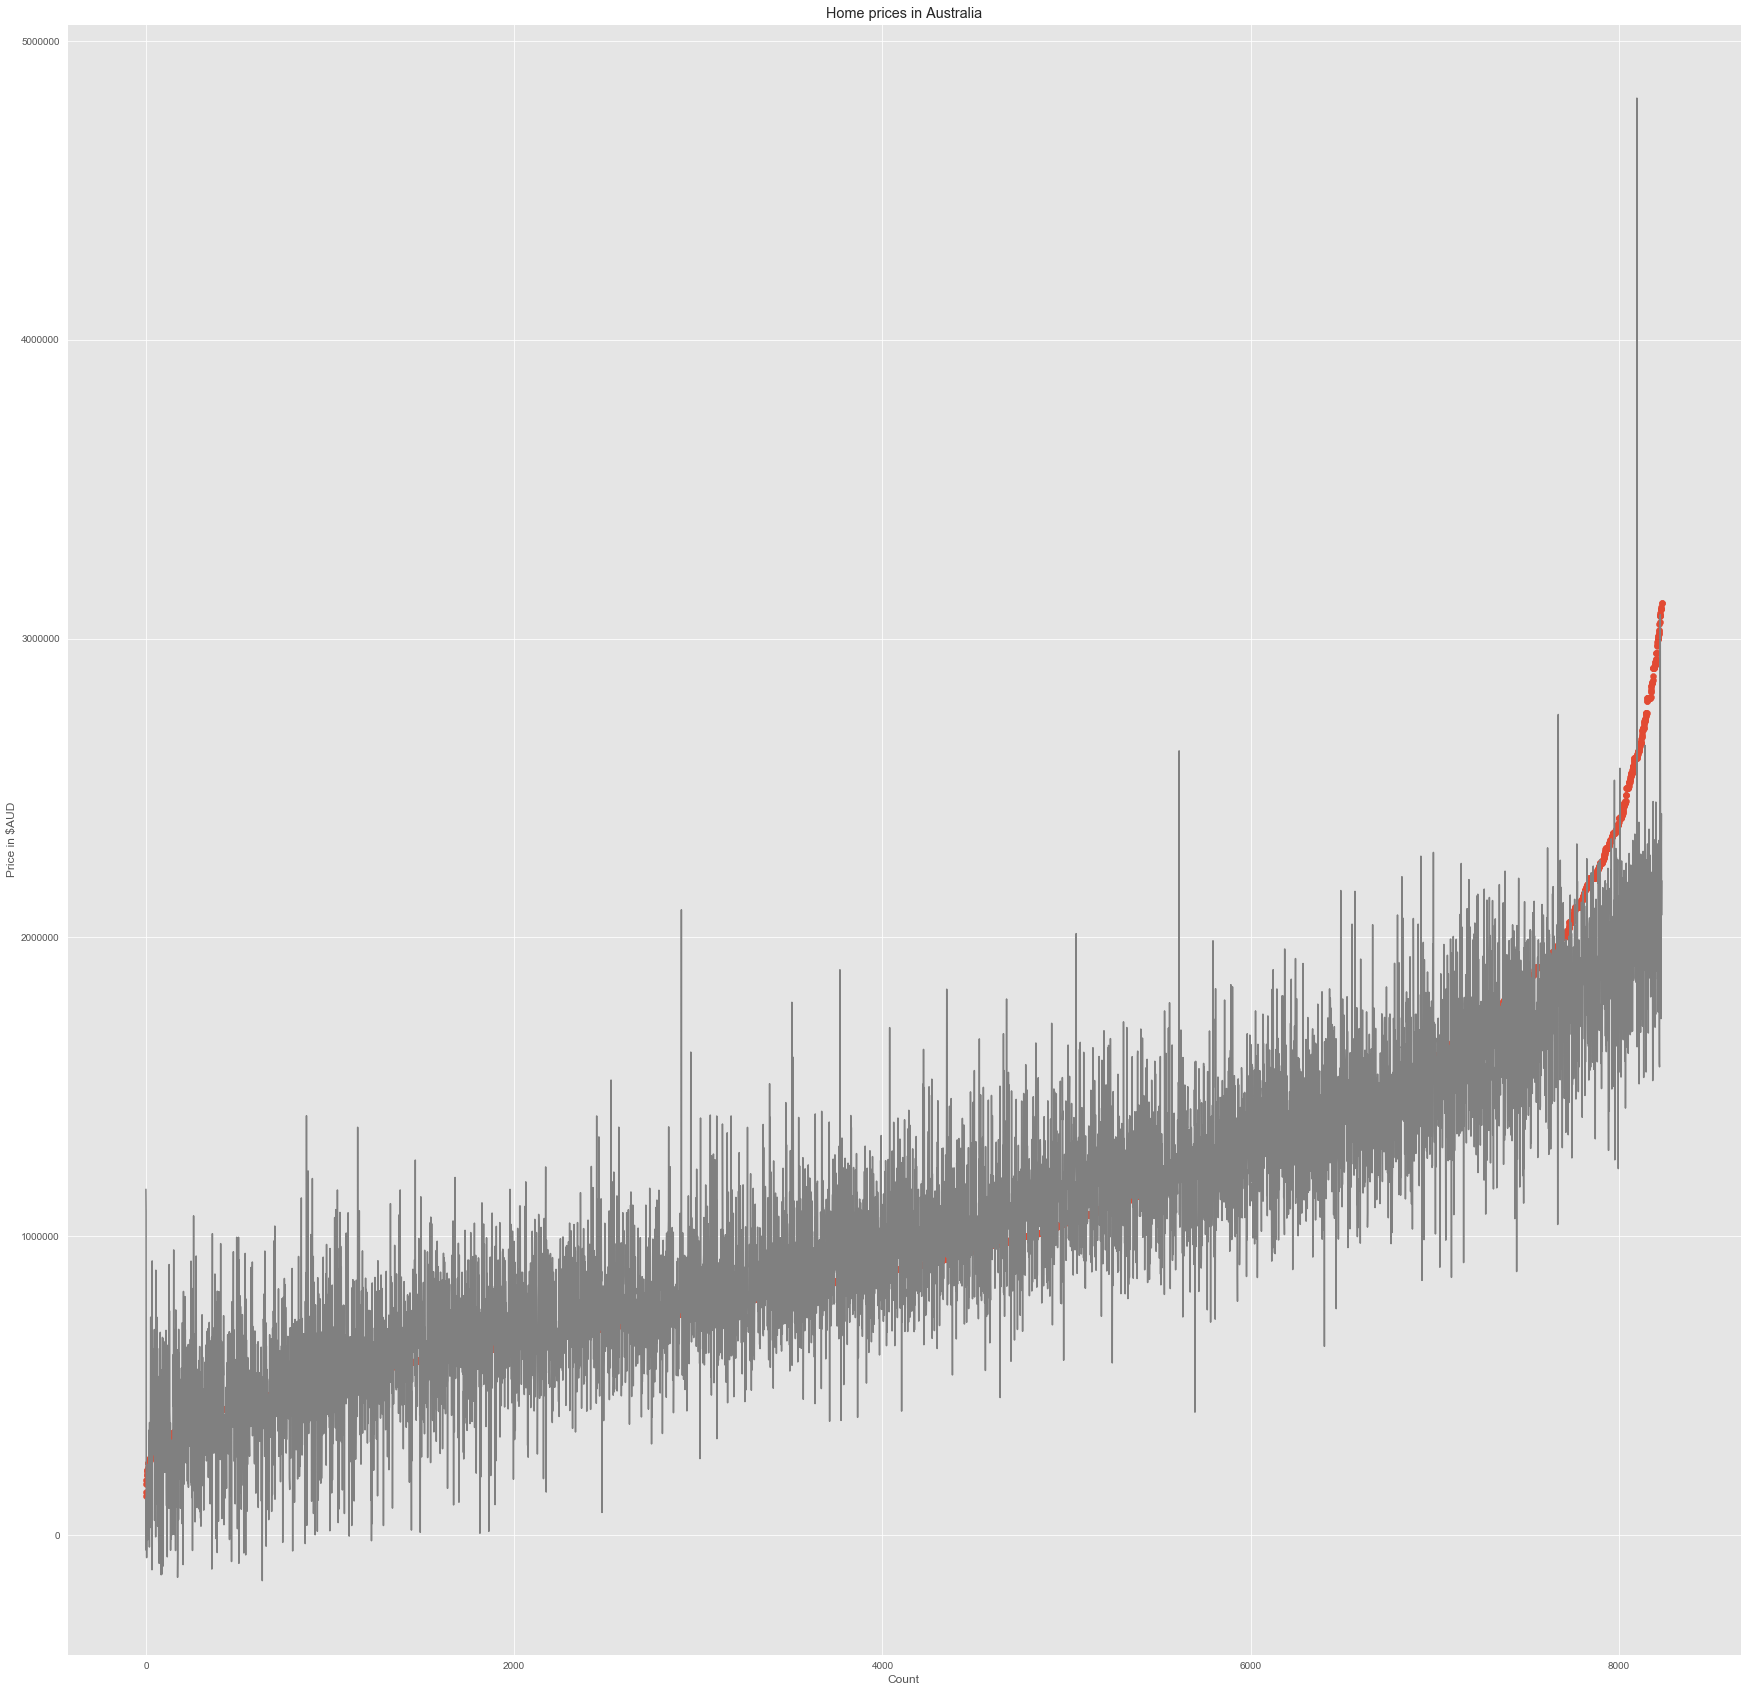

In [19]:
plt.figure(figsize=(30,30))
plt.plot(np.arange(8233), regr1.predict(x_sort2), color='gray')
plt.scatter(np.arange(8233), y.sort_values())
plt.xlabel('Count')
plt.ylabel('Price in $AUD')
plt.title('Home prices in Australia')
plt.show()

### Overall RandomForest has slightly higher accuracy here and plots the data a bit neater